<a href="https://colab.research.google.com/github/Reem-Aboutaleb/multimodal-stress-detection/blob/main/02_Preprocess_Signals_PPG_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving sample_signals.csv to sample_signals.csv


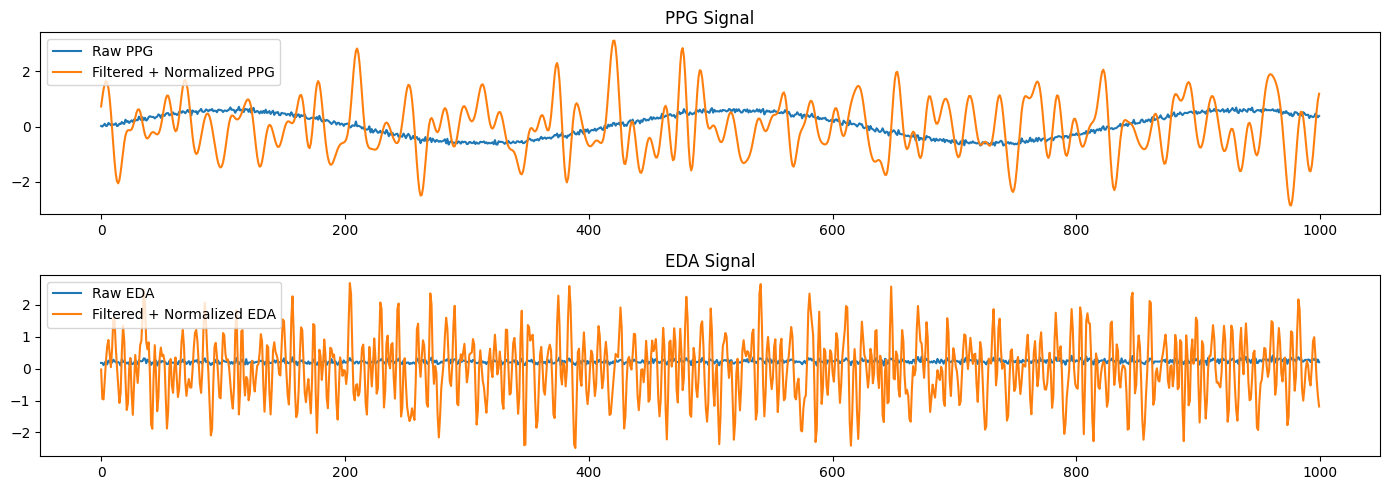

In [2]:
from google.colab import files
uploaded = files.upload()  # Upload sample_signals.csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

df = pd.read_csv('sample_signals.csv')
ppg = df['ppg']
eda = df['eda']
label = df['label']
def bandpass(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut/nyq, highcut/nyq], btype='band')
    return filtfilt(b, a, signal)

# Apply filtering (simulated sampling rates)
fs_ppg = 64
fs_eda = 4

filtered_ppg = bandpass(ppg, 0.5, 5.0, fs_ppg)
filtered_eda = bandpass(eda, 0.05, 1.0, fs_eda)

# Normalize
ppg_norm = (filtered_ppg - np.mean(filtered_ppg)) / np.std(filtered_ppg)
eda_norm = (filtered_eda - np.mean(filtered_eda)) / np.std(filtered_eda)
plt.figure(figsize=(14, 5))

plt.subplot(2, 1, 1)
plt.plot(ppg[:1000], label='Raw PPG')
plt.plot(ppg_norm[:1000], label='Filtered + Normalized PPG')
plt.legend()
plt.title('PPG Signal')

plt.subplot(2, 1, 2)
plt.plot(eda[:1000], label='Raw EDA')
plt.plot(eda_norm[:1000], label='Filtered + Normalized EDA')
plt.legend()
plt.title('EDA Signal')

plt.tight_layout()
plt.show()


